In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
## load joint info
JOINT_CSV_FILENAME = '/var/data/MET2/activity.csv'
IMG_PATH_PREFIX = '/var/data/MET2/'

numJoints = 14
# prepare column names 
colNames = list()
colNames.append('ID')
for n in range(numJoints):
    colNames.append("x{}".format(n+1))
    colNames.append("y{}".format(n+1))    
for n in range(numJoints):
    colNames.append("v{}".format(n+1))
#print(colNames)

# load csv file
MET2_joints=pd.read_csv(JOINT_CSV_FILENAME,header=None,names=colNames) # ,index_col=0)

 
MET2_joints['MET'] = np.NaN
MET2_joints['label'] = np.NaN

MET2_joints.head()

,ID,x1,y1,x2,y2,x3,y3,x4,y4,x5,...,v7,v8,v9,v10,v11,v12,v13,v14,MET,label
0,image/office activities/walking about/1.png,113,172,113,147,137,117,119,117,123,...,0,0,0,0,0,0,0,0,NaN,NaN
1,image/office activities/walking about/10.png,187,196,184,159,177,115,205,110,203,...,0,0,0,0,0,0,0,0,NaN,NaN
2,image/office activities/walking about/11.jpg,73,294,73,227,66,160,79,153,96,...,0,0,0,1,1,1,0,0,NaN,NaN
3,image/office activities/walking about/12.jpg,196,188,200,145,198,104,170,100,176,...,0,0,0,0,0,0,0,0,NaN,NaN
4,image/office activities/walking about/13.jpg,102,189,86,136,131,110,131,118,131,...,0,1,1,0,0,0,0,0,NaN,NaN


In [3]:
# dictionary of activity-MET  in the increasing order of MET

# 16 class model (960 samples)
# activity_MET = {"resting/sleeping" : 0.7,
#                 "resting/reclining" : 0.8, 
#                 "office activities/writing" : 1.0, 
#                 "office activities/reading.seated" : 1.0,
#                 "resting.seated.quiet" : 1.0, 
#                 "office activities/typing" : 1.1, 
#                 "resting/standing.relaxed" : 1.2, 
#                 "office activities/filing.seated" : 1.2, 
#                 "office activities/filing.stand" : 1.4,
#                 "miscellaneous occupational activity/cooking" : 1.6, 
#                 "office activities/walking about" : 1.7, 
#                 "miscellaneous occupational activity/machine work.sawing" : 1.8, 
#                 "miscellaneous occupational activity/machine work.light" : 2.0,
#                 "miscellaneous occupational activity/house cleaning" : 2.0, 
#                 "office activities/lifting.packing/lifting" : 2.1,
#                 "office activities/lifting.packing/packing" : 2.1
#                }

# 10 class model (600 samples)
activity_MET = {"resting/sleeping" : 0.7,
                "resting/reclining" : 0.8, 
                "office activities/writing" : 1.0, 
                "office activities/reading.seated" : 1.0,
                "resting.seated.quiet" : 1.0, 
                "office activities/typing" : 1.1, 
                "resting/standing.relaxed" : 1.2, 
                "office activities/filing.seated" : 1.2, 
                "office activities/filing.stand" : 1.4,
                "office activities/walking about" : 1.7, 
               }


METs = list()

for act in activity_MET:
    met = activity_MET[act]
    METs.append(met)
    print("{} : MET={}".format(act,met))
    
print(METs)



# label from 0
#label = list(range(len(METs)))
#print(label)

resting/sleeping : MET=0.7
resting/reclining : MET=0.8
office activities/writing : MET=1.0
office activities/reading.seated : MET=1.0
resting.seated.quiet : MET=1.0
office activities/typing : MET=1.1
resting/standing.relaxed : MET=1.2
office activities/filing.seated : MET=1.2
office activities/filing.stand : MET=1.4
office activities/walking about : MET=1.7
[0.7, 0.8, 1.0, 1.0, 1.0, 1.1, 1.2, 1.2, 1.4, 1.7]


In [4]:
# convert to 
#df = pd.DataFrame.from_dict(activity_MET, orient='index')
#df.columns = ['MET'] # , 'MET']

#print(df)

In [5]:
# add MET and count the number of each activity
ID=MET2_joints["ID"]

label = 0
for act in activity_MET:
    met = activity_MET[act]
    
    idx = ID.str.contains(act)
    
    MET2_joints["MET"][idx] = met
    MET2_joints["label"][idx] = int(label)
    
    
    
    count = sum(idx)    
    print("{} : MET={}, label={}, {} samples".format(act,met,label,count))

    label = label + 1

    MET2_joints.head()
    

# drop na
MET2_joints.dropna(inplace=True)

MET2_joints["label"] = MET2_joints["label"].astype('int') #.astype('category')    



resting/sleeping : MET=0.7, label=0, 60 samples
resting/reclining : MET=0.8, label=1, 60 samples

/Users/yyoo/tf3/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
/Users/yyoo/tf3/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()



office activities/writing : MET=1.0, label=2, 60 samples
office activities/reading.seated : MET=1.0, label=3, 60 samples
resting.seated.quiet : MET=1.0, label=4, 60 samples
office activities/typing : MET=1.1, label=5, 60 samples
resting/standing.relaxed : MET=1.2, label=6, 60 samples
office activities/filing.seated : MET=1.2, label=7, 60 samples
office activities/filing.stand : MET=1.4, label=8, 60 samples
office activities/walking about : MET=1.7, label=9, 60 samples


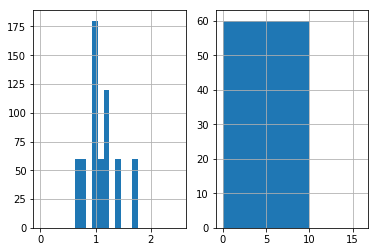

In [6]:
MET2_joints.describe()
#MET2_joints[["MET","label"]].describe()
#MET2_joints["MET"].value_counts
#MET2_joints["label"].value_counts

plt.subplot(121)
MET2_joints["MET"].hist(bins=np.linspace(0., 2.5,25))
plt.subplot(122)
MET2_joints["label"].hist(bins=np.linspace(0., 16, 17))

In [14]:
print(MET2_joints.shape)
MET2_joints.head()
#MET2_joints.describe()

(600, 45)


,ID,x1,y1,x2,y2,x3,y3,x4,y4,x5,...,v7,v8,v9,v10,v11,v12,v13,v14,MET,label
0,image/office activities/walking about/1.png,113,172,113,147,137,117,119,117,123,...,0,0,0,0,0,0,0,0,1.7,9
1,image/office activities/walking about/10.png,187,196,184,159,177,115,205,110,203,...,0,0,0,0,0,0,0,0,1.7,9
2,image/office activities/walking about/11.jpg,73,294,73,227,66,160,79,153,96,...,0,0,0,1,1,1,0,0,1.7,9
3,image/office activities/walking about/12.jpg,196,188,200,145,198,104,170,100,176,...,0,0,0,0,0,0,0,0,1.7,9
4,image/office activities/walking about/13.jpg,102,189,86,136,131,110,131,118,131,...,0,1,1,0,0,0,0,0,1.7,9


In [7]:
# Now let's shuffle!